In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsort_keygen
from sklearn.metrics import pairwise_distances

### <font color='goldenrod'>Scanner participants behavioral data</font>

In [2]:
datapath = '/Users/lindseytepfer/Documents/phd/inarr/behavioral_data/'
datalist = [x for x in os.listdir(datapath) if 'sub' in x] #len=28
movielist = ['physical', 'stutterer']

In [3]:
read_list = []

for i in datalist:
    read_list.append(pd.read_csv(datapath+i))

df = pd.concat(read_list)

#exclude the SEND data for this dataframe
df = df[(df.target == 'physical') | (df.target == 'stutterer')]

### Similarity matrix for scanner participants

In [4]:
df = pd.read_csv('behavioral_matrix.csv')
phys_df = df[(df.target == 'physical')].copy()
stut_df = df[(df.target == 'stutterer')].copy()

In [5]:
phys_df.sort_values(by=['version', 'subID'], key=natsort_keygen(), inplace=True)
X = phys_df[['bossy','conscientious', 'easygoing', 'humble', 'nosy', 'rebellious']].values
distance_matrix = pairwise_distances(X, metric='euclidean')
distance_df = pd.DataFrame(distance_matrix, index=phys_df.index, columns=phys_df.index)

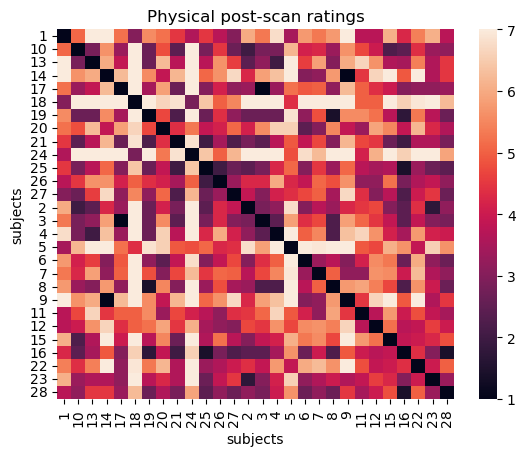

In [12]:
sns.heatmap(distance_df, vmin=1, vmax=7, xticklabels=phys_df.subID, yticklabels=phys_df.subID)
plt.title("Physical post-scan ratings")
plt.xlabel('subjects')
plt.ylabel('subjects')

plt.savefig("physical_rating_matrix.svg")

### Repeat the process for Stutterer

In [ ]:
stut_df.sort_values(by=['version', 'subID'], key=natsort_keygen(), inplace=True)
Xs = stut_df[['bossy','conscientious', 'easygoing', 'humble', 'nosy', 'rebellious']].values
stut_distance_matrix = pairwise_distances(Xs, metric='euclidean')
distance_df = pd.DataFrame(stut_distance_matrix, index=stut_df.index, columns=stut_df.index)

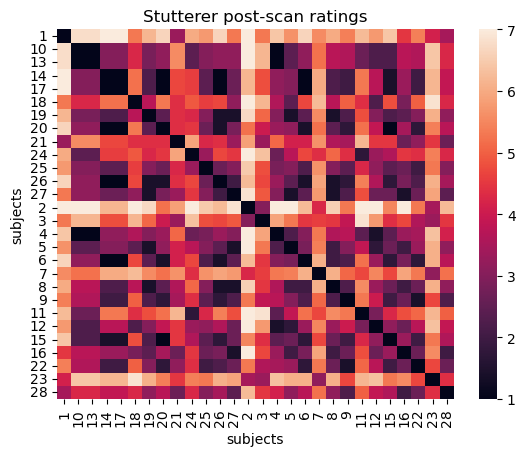

In [15]:
sns.heatmap(distance_df, vmin=1, vmax=7, xticklabels=stut_df.subID, yticklabels=stut_df.subID)
plt.title("Stutterer post-scan ratings")
plt.xlabel('subjects')
plt.ylabel('subjects')

plt.savefig("stutterer_rating_matrix.svg")

### Radar plots for scanner ratings

In [102]:
traitlist = list(df.trait.unique())
intervals = 360/len(traitlist) #60
degree_arr = np.arange(len(traitlist)) * intervals
angles = np.radians(degree_arr)

angles = np.concatenate((angles,[angles[0]]))
traitlist.append(traitlist[0])

In [ ]:
phys_v1_pivot = pd.pivot_table(df[(df.target=='physical') & (df.version == 1)],
 values=['response'], index='trait', aggfunc='mean').reset_index()
phys_v1_ratings = list(phys_v1_pivot['response'])

phys_v2_pivot = pd.pivot_table(df[(df.target=='physical') & (df.version == 2)],
 values=['response'], index='trait', aggfunc='mean').reset_index()
phys_v2_ratings = list(phys_v2_pivot['response'])

stut_v1_pivot = pd.pivot_table(df[(df.target=='stutterer') & (df.version == 1)],
 values=['response'], index='trait', aggfunc='mean').reset_index()
stut_v1_ratings = list(stut_v1_pivot['response'])

stut_v2_pivot = pd.pivot_table(df[(df.target=='stutterer') & (df.version == 2)],
 values=['response'], index='trait', aggfunc='mean').reset_index()
stut_v2_ratings = list(stut_v2_pivot['response'])

#close the plots by repeating the first angle
phys_v1_ratings.append(phys_v1_ratings[0])
phys_v2_ratings.append(phys_v2_ratings[0])
stut_v1_ratings.append(stut_v1_ratings[0])
stut_v2_ratings.append(stut_v2_ratings[0])

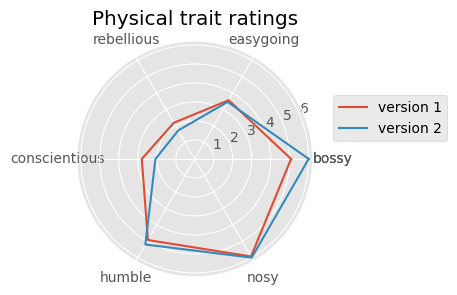

In [ ]:
plt.style.use('ggplot')

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

ax.plot(angles,phys_v1_ratings, label='version 1')
ax.plot(angles,phys_v2_ratings, label='version 2')

ax.set_thetagrids(angles * 180/np.pi, traitlist)
plt.title("Physical trait ratings")

plt.legend(bbox_to_anchor=(1.6,.8))
plt.tight_layout()

plt.savefig("physical_polarplot.svg")
plt.show()

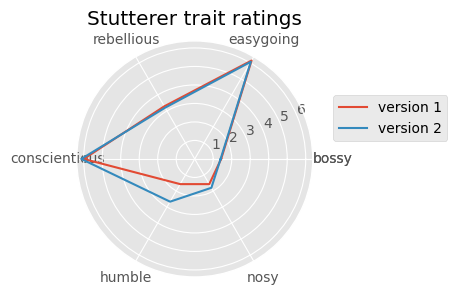

In [ ]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

ax.plot(angles,stut_v1_ratings, label='version 1')
ax.plot(angles,stut_v2_ratings, label='version 2')

ax.set_thetagrids(angles * 180/np.pi, traitlist)
plt.title("Stutterer trait ratings")

plt.legend(bbox_to_anchor=(1.6,.8))
plt.tight_layout()

plt.savefig("stutterer_polarplot.svg")
plt.show()

### Illustrate waveform shape of silenced vs unsileneced segments

In [24]:
from moviepy.editor import VideoFileClip
from scipy.io import wavfile
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt

In [49]:
inarr_clip_paths = "/Users/lindseytepfer/Documents/phd/inarr/app_stimuli/clips/"

im_clip = VideoFileClip(inarr_clip_paths+"physical-v1_clip_1.mp4")
im_removed_clip = VideoFileClip(inarr_clip_paths+"physical-v2_clip_1.mp4")
nim_clip = VideoFileClip("/Users/lindseytepfer/Documents/phd/inarr/figures/wave_files/physical-v1_clip_0_bungalow.mp4")

im_clip.audio.to_audiofile("im_clip_audio.wav")
im_removed_clip.audio.to_audiofile("im_removed_clip_audio.wav")
nim_clip.audio.to_audiofile("nim_clip_audio.wav")

MoviePy - Writing audio in im_clip_audio.wav


MoviePy - Done.
MoviePy - Writing audio in im_removed_clip_audio.wav


MoviePy - Done.
MoviePy - Writing audio in nim_clip_audio.wav


MoviePy - Done.


In [50]:
sample_rate1, im_clip_wav = wavfile.read("im_clip_audio.wav")
time_1 = np.arange(0, len(im_clip_wav)) / sample_rate1

sample_rate2, im_removed_clip_wav = wavfile.read("im_removed_clip_audio.wav")
time_2 = np.arange(0, len(im_removed_clip_wav)) / sample_rate2

sample_rate3, nim_clip_wav = wavfile.read("nim_clip_audio.wav")
time_3 = np.arange(0, len(nim_clip_wav)) / sample_rate3

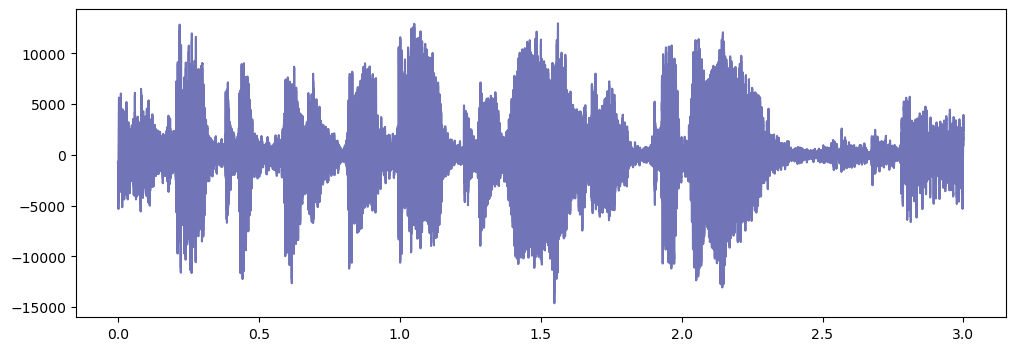

In [43]:
plt.figure(figsize=(12, 4))
plt.plot(time_1, im_clip_wav, color='#7174B6')

plt.savefig("internal_monologue_unmuted.svg")
plt.show()

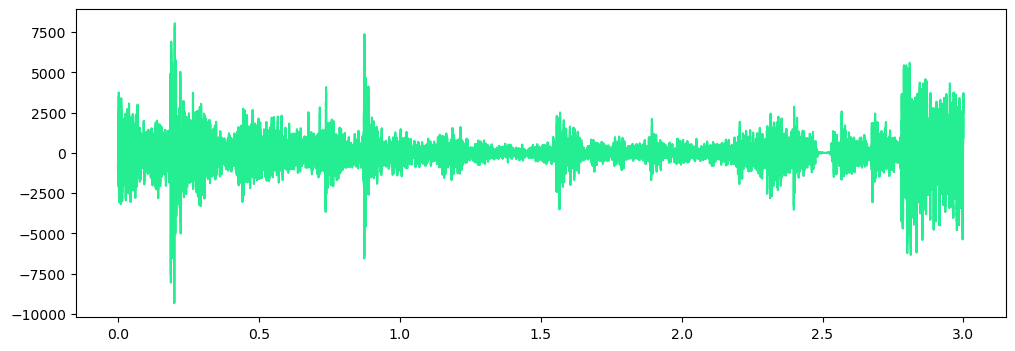

In [44]:
plt.figure(figsize=(12, 4))
plt.plot(time_2, im_removed_clip_wav, color='#24ED92')
plt.savefig("internal_monologue_silenced.svg")
plt.show()

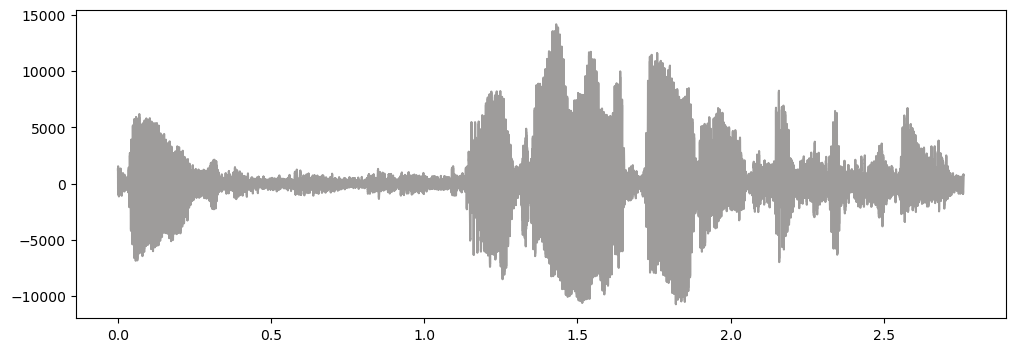

In [51]:
plt.figure(figsize=(12, 4))
plt.plot(time_3, nim_clip_wav, color='#9E9C9B')
plt.savefig("no_internal_monologue.svg")
plt.show()